In [ ]:
"I live in New York"
"Indian Institite Technology"

=> PMI - Pointwise Mutual Information

PMI(X,Y) = log(P(X,Y)/P(X)P(Y))

In [1]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

corpus = ['this', 'is', 'a', 'sample', 'this', 'is', 'another', 'example', 'this', 'is', 'a', 'test']
finder = BigramCollocationFinder.from_words(corpus)
pmi_scores = finder.score_ngrams(BigramAssocMeasures.pmi)
pmi_scores

[(('another', 'example'), 3.584962500721156),
 (('a', 'sample'), 2.584962500721156),
 (('a', 'test'), 2.584962500721156),
 (('example', 'this'), 2.0),
 (('is', 'a'), 2.0),
 (('is', 'another'), 2.0),
 (('sample', 'this'), 2.0),
 (('this', 'is'), 2.0)]

In [2]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

corpus ='this', 'is', 'a', [ 'sample', 'this', 'is', 'another', 'example', 'this', 'is', 'a', 'test']

finder = TrigramCollocationFinder.from_words(corpus)
pmi_scores = finder.score_ngrams(TrigramAssocMeasures.pmi)
pmi_scores

[(('another', 'example', 'this'), 5.584962500721156),
 (('is', 'another', 'example'), 5.584962500721156),
 (('a', 'sample', 'this'), 4.584962500721156),
 (('is', 'a', 'sample'), 4.584962500721156),
 (('is', 'a', 'test'), 4.584962500721156),
 (('example', 'this', 'is'), 4.0),
 (('sample', 'this', 'is'), 4.0),
 (('this', 'is', 'a'), 4.0),
 (('this', 'is', 'another'), 4.0)]

In [4]:
list1 = [1,2,3,4]
list1.append(5)
list1

[1, 2, 3, 4, 5]

In [5]:
list1 = [1,2,3,4]
list2 = [5,6,7]
list1.append(list2)
list1

[1, 2, 3, 4, [5, 6, 7]]

In [7]:
list1 = [1,2,3,4]
list2 = [5,6,7]
list1+list2

[1, 2, 3, 4, 5, 6, 7]

In [6]:
list1 = [1,2,3,4]
list2 = [5,6,7]
list1.extend(list2)
list1

[1, 2, 3, 4, 5, 6, 7]

In [8]:
import re
from nltk.tokenize import word_tokenize

def preprocess_text(corpus):
    """
    1. lowercasing
    2. Remove Punctuations
    3. Tokenization
    """
    cleaned_corpus = []
    for text in corpus:
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        words = word_tokenize(text)
        cleaned_corpus.extend(words)
    return cleaned_corpus

corpus = [
    "This is a sample text for testing PMI.",
    "PMI helps measure word associations in a text corpus.",
    "This is another example of PMI usage."
]
tokenized_corpus = preprocess_text(corpus)
print("Tokenized Corpus:", tokenized_corpus)

Tokenized Corpus: ['this', 'is', 'a', 'sample', 'text', 'for', 'testing', 'pmi', 'pmi', 'helps', 'measure', 'word', 'associations', 'in', 'a', 'text', 'corpus', 'this', 'is', 'another', 'example', 'of', 'pmi', 'usage']


In [17]:
from nltk.util import ngrams
from collections import Counter

n = 2
bigrams = list(ngrams(tokenized_corpus, n))

bigram_counts = Counter(bigrams)
unigram_counts = Counter(tokenized_corpus)

print("Bigram Counts:", bigram_counts)
print("\n")
print("Unigram Counts:", unigram_counts)

Bigram Counts: Counter({('this', 'is'): 2, ('is', 'a'): 1, ('a', 'sample'): 1, ('sample', 'text'): 1, ('text', 'for'): 1, ('for', 'testing'): 1, ('testing', 'pmi'): 1, ('pmi', 'pmi'): 1, ('pmi', 'helps'): 1, ('helps', 'measure'): 1, ('measure', 'word'): 1, ('word', 'associations'): 1, ('associations', 'in'): 1, ('in', 'a'): 1, ('a', 'text'): 1, ('text', 'corpus'): 1, ('corpus', 'this'): 1, ('is', 'another'): 1, ('another', 'example'): 1, ('example', 'of'): 1, ('of', 'pmi'): 1, ('pmi', 'usage'): 1})


Unigram Counts: Counter({'pmi': 3, 'this': 2, 'is': 2, 'a': 2, 'text': 2, 'sample': 1, 'for': 1, 'testing': 1, 'helps': 1, 'measure': 1, 'word': 1, 'associations': 1, 'in': 1, 'corpus': 1, 'another': 1, 'example': 1, 'of': 1, 'usage': 1})


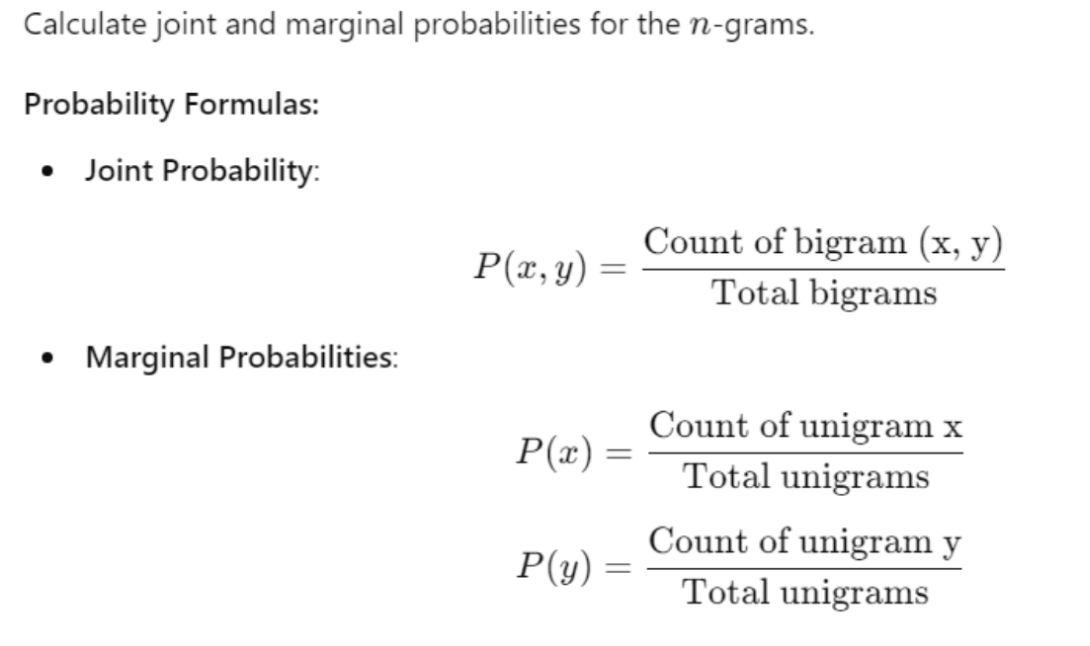

In [21]:
import math
def pmi_for_ngrams(tokens,n):
    unigram_counts = Counter(tokens)
    ngram_counts = Counter(ngrams(tokens,n))
    print("unigrams")
    print(unigram_counts)
    print("\n")
    print("ngrams")
    print(ngram_counts)
    print("\n")

    total_unigrams = sum(unigram_counts.values())
    total_ngrams = sum(ngram_counts.values())

    pmi_scores = {}

    for ngram,freq in ngram_counts.items():
        print("ngram:",ngram, "freq:", freq)
        # probability og the n-gram
        p_ngram = freq/total_ngrams # P(X,Y), P(X,Y,Z)

        # product of unigram probabilities # P(X) P(Y), P(X) P(Y) P(Z)
        mul = 1
        for word in ngram:
            mul = mul*(unigram_counts[word]/total_unigrams)

        pmi = math.log2(p_ngram/mul)
        pmi_scores[ngram] = pmi

    return pmi_scores

pmi_for_ngrams(tokenized_corpus,4)

unigrams
Counter({'pmi': 3, 'this': 2, 'is': 2, 'a': 2, 'text': 2, 'sample': 1, 'for': 1, 'testing': 1, 'helps': 1, 'measure': 1, 'word': 1, 'associations': 1, 'in': 1, 'corpus': 1, 'another': 1, 'example': 1, 'of': 1, 'usage': 1})


ngrams
Counter({('this', 'is', 'a', 'sample'): 1, ('is', 'a', 'sample', 'text'): 1, ('a', 'sample', 'text', 'for'): 1, ('sample', 'text', 'for', 'testing'): 1, ('text', 'for', 'testing', 'pmi'): 1, ('for', 'testing', 'pmi', 'pmi'): 1, ('testing', 'pmi', 'pmi', 'helps'): 1, ('pmi', 'pmi', 'helps', 'measure'): 1, ('pmi', 'helps', 'measure', 'word'): 1, ('helps', 'measure', 'word', 'associations'): 1, ('measure', 'word', 'associations', 'in'): 1, ('word', 'associations', 'in', 'a'): 1, ('associations', 'in', 'a', 'text'): 1, ('in', 'a', 'text', 'corpus'): 1, ('a', 'text', 'corpus', 'this'): 1, ('text', 'corpus', 'this', 'is'): 1, ('corpus', 'this', 'is', 'another'): 1, ('this', 'is', 'another', 'example'): 1, ('is', 'another', 'example', 'of'): 1, ('another',

{('this', 'is', 'a', 'sample'): 10.947532580105864,
 ('is', 'a', 'sample', 'text'): 10.947532580105864,
 ('a', 'sample', 'text', 'for'): 11.947532580105864,
 ('sample', 'text', 'for', 'testing'): 12.947532580105864,
 ('text', 'for', 'testing', 'pmi'): 11.362570079384708,
 ('for', 'testing', 'pmi', 'pmi'): 10.777607578663552,
 ('testing', 'pmi', 'pmi', 'helps'): 10.777607578663552,
 ('pmi', 'pmi', 'helps', 'measure'): 10.777607578663552,
 ('pmi', 'helps', 'measure', 'word'): 12.362570079384708,
 ('helps', 'measure', 'word', 'associations'): 13.947532580105864,
 ('measure', 'word', 'associations', 'in'): 13.947532580105864,
 ('word', 'associations', 'in', 'a'): 12.947532580105864,
 ('associations', 'in', 'a', 'text'): 11.947532580105864,
 ('in', 'a', 'text', 'corpus'): 11.947532580105864,
 ('a', 'text', 'corpus', 'this'): 10.947532580105864,
 ('text', 'corpus', 'this', 'is'): 10.947532580105864,
 ('corpus', 'this', 'is', 'another'): 11.947532580105864,
 ('this', 'is', 'another', 'example

In [18]:
list1 = [1,2,3,4,5]
mul = 1
for num in list1:
    mul = mul*num
mul
    

120